In [2]:
import pandas as pd
import numpy as np

## Introduction

This is some data that I took from myself between late March and early May of 2023. I was curious what factors affected my sleep quality and wanted to apply skills I learned in my classes.  

Variables:

Quality: my quality of sleep was noted after I woke up and is on a scale of 1 to 5, 5 being very good and 1 being bad. Unfortunately, they are discrete, which makes statistical analysis harder. 


Meditate: if I meditated before going to sleep

Walk/run?: if I either went on a intentional 15+ minute walk or on a run that day. There is only one day where I didn't do either. 

Screen: if I looked at a screen at least 15 minutes before sleeping. 

Nap: if I took a nap earlier that day

Tiredness: how tired I felt before sleeping, on a scale of 1 to 5. 5 = very tired, 1= energetic. 

Quality of day: how I rated my day on a scale of 1 to 5, 5 being very good and 1 being bad. This is a general indicator of how happy I was during the day. 

For both tiredness and quality of day, I didn't start recording them until later into my logging; that is why there are missing values. 


In [3]:
sleep_df = pd.read_csv('data/sleep-data.csv')

In [4]:
sleep_df = sleep_df.assign(Quality = sleep_df.get('Quality').transform(float))
sleep_df

,night,Quality,Time slept,Time woken up,Meditate?,Walk/run?,Screen?,Nap?,Tiredness before,Quality of day
0,3/26,2.0,11:20,6:50,yes,walk,yes,no,NaN,NaN
1,3/27,4.0,10:50,6:50,yes,run,yes,no,NaN,NaN
2,3/28,4.5,11:15,7:30,no,walk,no,no,NaN,NaN
3,3/29,3.0,11:00,6:50,no,run,no,no,NaN,NaN
4,3/30,3.0,12:00,7:25,no,walk,yes,no,NaN,NaN
5,3/31,4.0,11:05,8:30,no,walk,no,no,NaN,NaN
6,4/3,4.5,11:50,6:50,yes,no,yes,no,NaN,NaN
7,4/4,4.0,11:20,6:50,no,run,no,no,NaN,NaN
8,4/5,2.0,11:40,6:50,no,run,no,no,NaN,NaN
9,4/6,3.0,11:45,7:25,yes,run,no,yes,NaN,NaN


In [7]:
sleep_df[['Quality', 'Tiredness before', 'Quality of day', 'Meditate?']].groupby('Meditate?').mean()

,Quality,Tiredness before,Quality of day
Meditate?,,,
no,3.826087,3.65625,3.50
yes,3.642857,3.50000,3.75


In [10]:
# clean data. make a column of values called total_time_slept that calcualtes how many 
# hours were slept in total

def time_between(sleep, wake):
    wake_list = wake.split(':')
    wake_list[0] = int(wake_list[0]) + 12
    wake_list[1] = int(wake_list[1])
    wake_list = np.array(wake_list)
    
    sleep_list = sleep.split(':')
    sleep_list[0] = int(sleep_list[0])
    sleep_list[1] = int(sleep_list[1])
    sleep_list = np.array(sleep_list)

    time = wake_list - sleep_list
    
    return time[0] + time[1] / 60

times_sleep = np.array(sleep_df['Time slept'])
times_wake = np.array(sleep_df['Time woken up'])


total_times = []
for i in range(len(times_sleep)):
    sleep = times_sleep[i]
    wake = times_wake[i]
    time = time_between(sleep, wake)
    total_times.append(time)

sleep_df = sleep_df.assign(total_time_slept = total_times)


In [6]:
print(time_between('11:20', '8:00'))

8.666666666666666


In [11]:
sleep_df

,night,Quality,Time slept,Time woken up,Meditate?,Walk/run?,Screen?,Nap?,Tiredness before,Quality of day,total_time_slept
0,3/26,2.0,11:20,6:50,yes,walk,yes,no,NaN,NaN,7.500000
1,3/27,4.0,10:50,6:50,yes,run,yes,no,NaN,NaN,8.000000
2,3/28,4.5,11:15,7:30,no,walk,no,no,NaN,NaN,8.250000
3,3/29,3.0,11:00,6:50,no,run,no,no,NaN,NaN,7.833333
4,3/30,3.0,12:00,7:25,no,walk,yes,no,NaN,NaN,7.416667
5,3/31,4.0,11:05,8:30,no,walk,no,no,NaN,NaN,9.416667
6,4/3,4.5,11:50,6:50,yes,no,yes,no,NaN,NaN,7.000000
7,4/4,4.0,11:20,6:50,no,run,no,no,NaN,NaN,7.500000
8,4/5,2.0,11:40,6:50,no,run,no,no,NaN,NaN,7.166667
9,4/6,3.0,11:45,7:25,yes,run,no,yes,NaN,NaN,7.666667


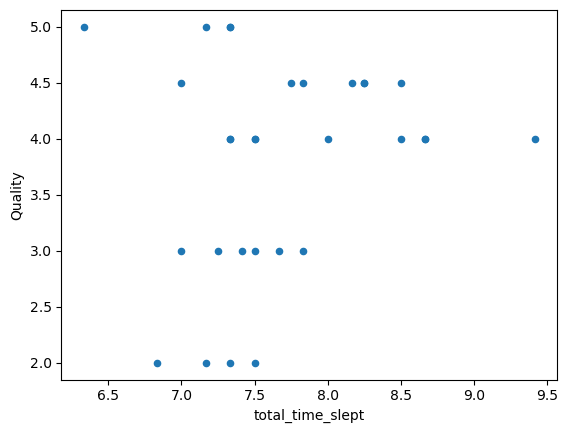

In [9]:
sleep_df.plot.scatter(x='total_time_slept', y='Quality');

There seems to be no correlation. But if the outlier point at 6.3 hours of sleep is removed, there could be a positive correlation with time slept and quality. There is another problem, which is that quality of sleep was not a continuous variable when I rated it on a scale of 1 to 5. 

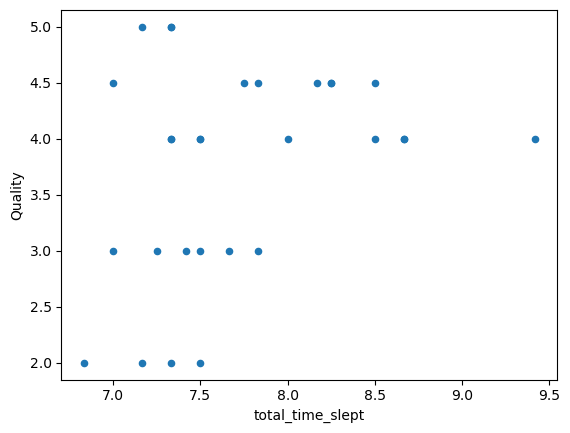

In [15]:
sleep_no_outlier = sleep_df.drop(index = 23)
sleep_no_outlier.plot.scatter(x = 'total_time_slept', y='Quality');

In [16]:
# calculate the correlation coefficient between total time slept and quality of sleep

def standardize(values):
    m = values.mean()
    return (values - m) / np.std(values)

def calculate_r(df, x, y):
    standard_x = standardize(df[x])
    standard_y = standardize(df[y])
    return (standard_x * standard_y).mean()

r = calculate_r(sleep_no_outlier, 'total_time_slept', 'Quality')

In [17]:
mean_time = sleep_no_outlier['total_time_slept'].mean()
sd_time = np.std(sleep_no_outlier['total_time_slept'])
mean_y = sleep_no_outlier['Quality'].mean()
sd_y = np.std(sleep_no_outlier['Quality'])
def predict(time_slept):
    y_su = r * (time_slept - mean_time) / sd_time
    return y_su * sd_y + mean_y

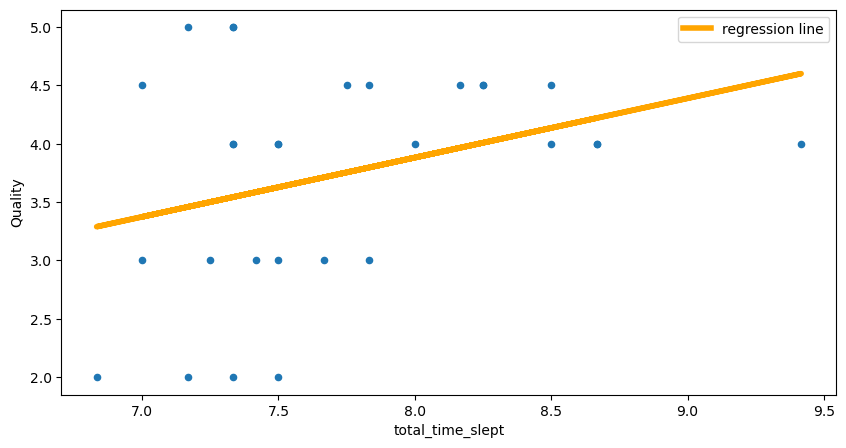

In [18]:
predictions = sleep_no_outlier.assign(predicted_quality = sleep_no_outlier['total_time_slept'].transform(predict))
ax = predictions.plot(kind='scatter', x='total_time_slept', y='Quality', figsize=(10, 5))

predictions.plot(kind='line', x='total_time_slept', y='predicted_quality', ax = ax, color='orange', \
                 label='regression line', lw=4);

So, there is a weak positive association with time slept and quality of sleep

In [19]:
sleep_df[['Quality', 'Tiredness before', 'Quality of day', 'total_time_slept', 
          'Screen?']].groupby('Screen?').mean()

,Quality,Tiredness before,Quality of day,total_time_slept
Screen?,,,,
no,3.947368,3.863636,3.454545,7.701754
yes,3.500000,3.285714,3.642857,7.636364


In [22]:
sleep_df[['Quality', 'Tiredness before', 'Quality of day', 
          'total_time_slept', 'Nap?']].groupby('Nap?').mean()

,Quality,Tiredness before,Quality of day,total_time_slept
Nap?,,,,
no,3.74,3.75,3.535714,7.683333
yes,4.00,3.25,3.500000,7.650000


## Looking at screens and sleep quality: permutation test

Based on the data above, looking at a screen right before sleeping is correlated with worse sleep quality. But is it statistically significant? 

Null hypothesis: taking a nap during the day is not correlated with quality of sleep

Alternative hypothesis: taking a nap during the day is correlated with a higher quality of sleep at night

Note: Like all studies, I cannot find causation, only correlation. There could be a chance that looking at a screen is correlated with another variable that is the real cause for better sleep


I will do a permutation test

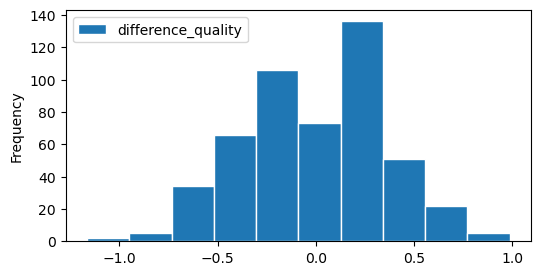

In [23]:
def difference_screen(df):
    means = df[['shuffled_screen', 'Quality']].groupby('shuffled_screen').mean()['Quality']
    return means.loc['yes'] - means.loc['no']

differences = np.array([])
for i in np.arange(500):
    shuffled = np.random.permutation(sleep_df['Screen?'])
    shuffled_df = sleep_df.assign(shuffled_screen = shuffled)
    diff = difference_screen(shuffled_df)
    differences = np.append(differences, diff)
pd.DataFrame().assign(difference_quality = differences).plot(kind = 'hist', ec = 'w', figsize = (6, 3));
    

In [24]:
grouped = sleep_df[['Quality', 'Screen?']].groupby('Screen?').mean()
observed_diff = float(grouped.loc['no'] - grouped.loc['yes'])
observed_diff

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_88494/3817497559.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  observed_diff = float(grouped.loc['no'] - grouped.loc['yes'])


0.4473684210526314

In [25]:
np.count_nonzero(differences >= observed_diff) / len(differences)

0.106

The p value is too high for it to be statistically significant. 

## How early I sleep and how it affects sleep quality: linear regression
Let's investigate another variable: if sleeping early results in better quality sleep. I first have to quantify the time slept, so I'll convert the values into minutes after 10 pm. I'll also just create a data frame with only when I slept and quality of sleep, to make things simpler. 

In [26]:
def min_after_10(time):
    split_time = time.split(':')
    split_time[0] = int(split_time[0])
    split_time[1] = int(split_time[1])
    return (split_time[0] - 10) * 60 + split_time[1]

new_df = pd.DataFrame().assign(time_slept = sleep_df['Time slept'].transform(min_after_10))
new_df = new_df.assign(quality = sleep_df['Quality'])
new_df

,time_slept,quality
0,80,2.0
1,50,4.0
2,75,4.5
3,60,3.0
4,120,3.0
5,65,4.0
6,110,4.5
7,80,4.0
8,100,2.0
9,105,3.0


<Axes: xlabel='time_slept', ylabel='quality'>

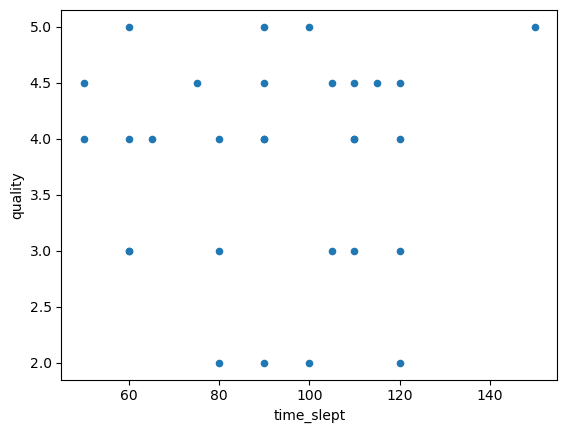

In [27]:
new_df.plot(kind = 'scatter', x='time_slept', y='quality')

There seems to be no correlation between how early I sleep and the quality of sleep I get.  

## Quality of day v. quality of sleep: linear regression

In [28]:
quality_day_df = sleep_df.iloc[12:29 + 1].reset_index()
quality_day_df

,index,night,Quality,Time slept,Time woken up,Meditate?,Walk/run?,Screen?,Nap?,Tiredness before,Quality of day,total_time_slept
0,12,4/9,5.0,11:30,6:50,no,run,no,no,5.0,4.0,7.333333
1,13,4/10,4.0,11:30,6:50,no,walk,no,no,5.0,4.0,7.333333
2,14,4/11,3.0,11:20,6:50,no,run,yes,yes,4.0,3.0,7.500000
3,15,4/12,3.0,11:50,6:50,no,walk,yes,no,3.0,3.0,7.000000
4,16,4/13,4.0,11:00,6:30,yes,run,yes,no,3.5,3.5,7.500000
5,17,4/15,4.0,12:00,8:30,yes,run,yes,no,3.5,4.0,8.500000
6,18,4/16,4.5,11:30,8:00,no,run,yes,no,3.0,4.0,8.500000
7,19,4/17,4.5,11:45,8:00,no,walk,yes,no,2.0,5.0,8.250000
8,20,4/18,4.5,11:55,7:45,no,run,no,no,3.5,4.0,7.833333
9,21,4/19,4.5,12:00,7:45,no,walk,no,yes,3.0,5.0,7.750000


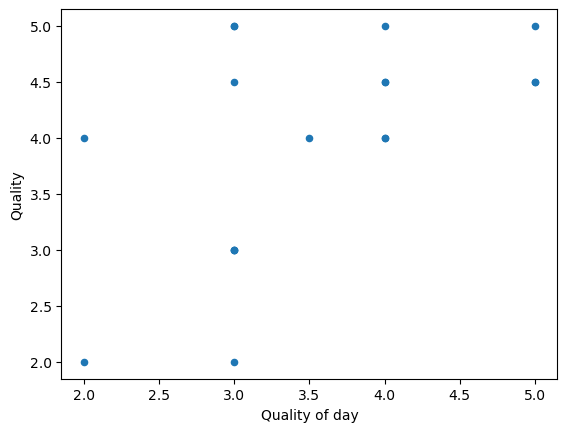

In [26]:
quality_day_df.plot(kind = 'scatter', x='Quality of day', y='Quality');

There seems to be a positive correlation that's relatively strong. I will calculate r:

In [27]:
print(calculate_r(quality_day_df, 'Quality of day', 'Quality'))

0.5435603598113905


Analyzing how tiredness before my sleep impacts sleep quality:

<Axes: xlabel='Tiredness before', ylabel='Quality'>

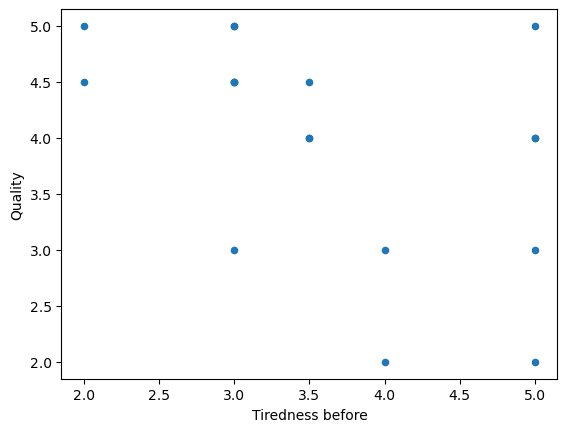

In [29]:
tired_df = (sleep_df.iloc[12:29 + 1].reset_index().assign(tired = sleep_df.get('Tiredness before'))
            .assign(quality = sleep_df.get('Quality')))
tired_df.plot(kind = 'scatter', x= 'Tiredness before', y = 'Quality')

There seems to be no correlation between tiredness before and quality of sleep. 

## Conclusion
Based on my study, sleep time, not looking at a screen, and having a good day are correlated with having better sleep quality. Specifically, quality of the day was most important, with screen time and sleep time being tied for equal importance if I wanted to inflate the correlation coefficient. 
However, there were many flaws in the data, including a sample size of only 30, missing values for quality of day, and discrete values for sleep quality. 